In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Implementing an intensity transformation on Emma Watson

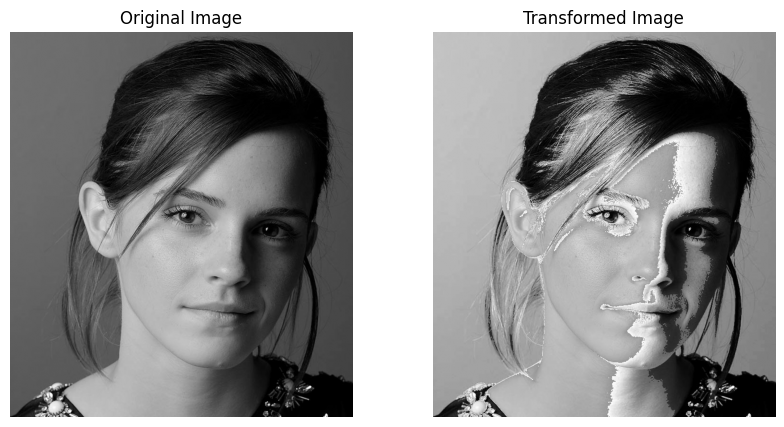

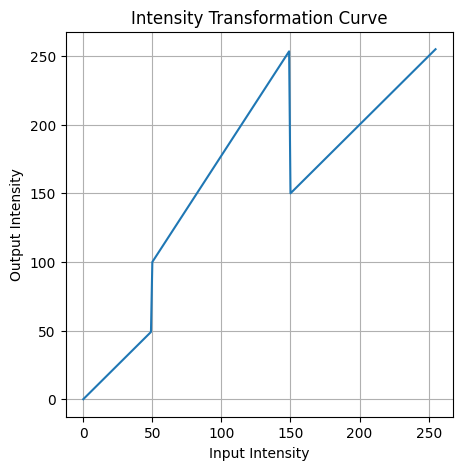

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Read the image
image=cv2.imread('/content/drive/MyDrive/A1Vision/emma.jpg',cv2.IMREAD_GRAYSCALE)

def intensity_transformation(input_intensity):
  if input_intensity <50:
    return input_intensity
  elif input_intensity<150:
    return(1.55*input_intensity+22.5)
  else:
    return input_intensity

# Vectorize the function to apply to the image
vectorized_transformation = np.vectorize(intensity_transformation)

# Apply the transformation to the image
transformed_image = vectorized_transformation(image).astype(np.uint8)


# Plot the original and transformed images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display the transformed image
plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')
plt.axis('off')

plt.show()

# Plot the intensity transformation curve
input_intensity = np.arange(0, 256)
output_intensity = np.array([intensity_transformation(x) for x in input_intensity])

plt.figure(figsize=(5, 5))
plt.plot(input_intensity, output_intensity, label="Intensity Transformation")
plt.title('Intensity Transformation Curve')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.show()



Pixel values in the [0,50] and [150,255] ranges are mapped similarly, resulting in little change in her hair color, which falls in the lower range. Mid-range values (50-150) are exaggerated, causing white patches on the right side of the face, while the left side, being in the 150+ range, shows minimal change.

# Intensity transformation on brain proton density image

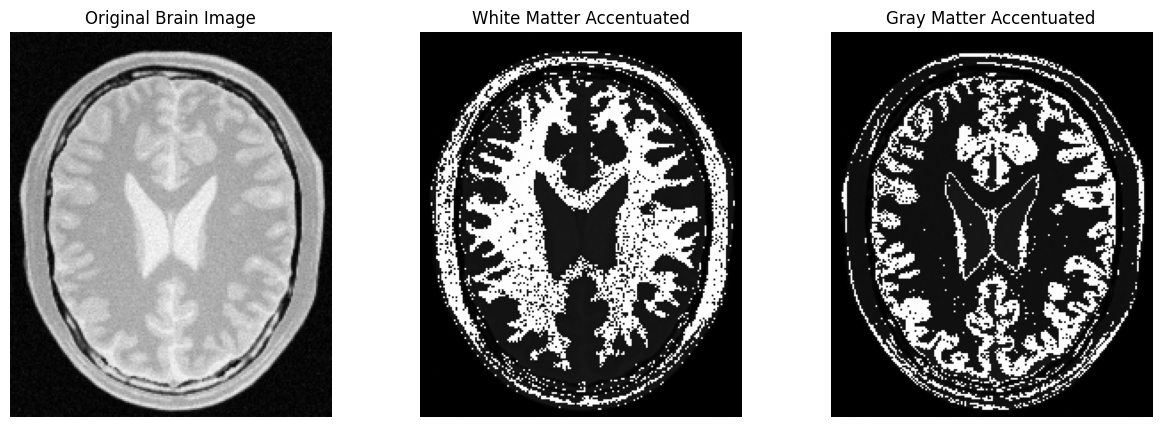

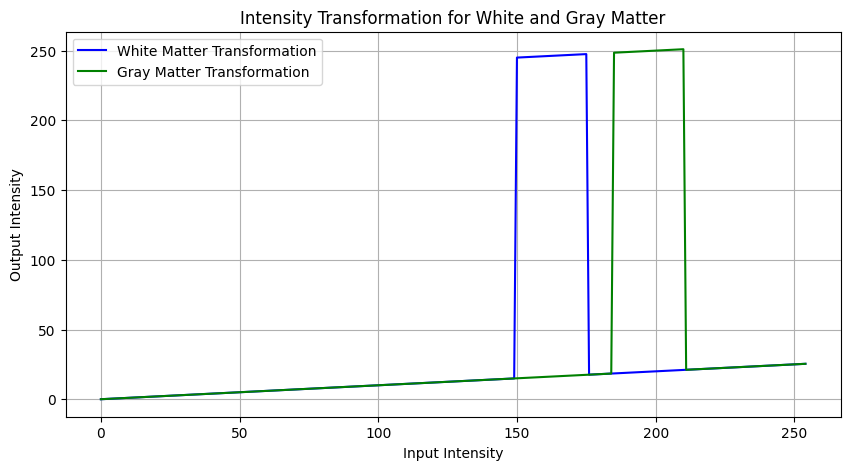

In [ ]:
brain_image = cv2.imread('/content/drive/MyDrive/A1Vision/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)


def accentuate_white_matter(intensity):
  if intensity <150:
    return intensity*0.1
  elif intensity>=150 and intensity <=175:
    return (255-25 + intensity*0.1)
  else:
    return intensity*0.1


def accentuate_gray_matter(intensity):
    # Custom function to enhance gray matter
    if intensity < 150:
        return intensity*0.1
    elif intensity >= 185 and intensity <= 210:
        return (255 - 25 + intensity*0.1)
    else:
        return intensity*0.1


# Vectorize the functions
accentuate_white_matter_vec = np.vectorize(accentuate_white_matter)
accentuate_gray_matter_vec = np.vectorize(accentuate_gray_matter)

# Apply transformations to the brain image
white_matter_image = accentuate_white_matter_vec(brain_image).astype(np.uint8)
gray_matter_image = accentuate_gray_matter_vec(brain_image).astype(np.uint8)

# Display the original and transformed images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.title('Original Brain Image')
plt.imshow(brain_image, cmap='gray')
plt.axis('off')

# White matter accentuated
plt.subplot(1, 3, 2)
plt.title('White Matter Accentuated')
plt.imshow(white_matter_image, cmap='gray')
plt.axis('off')

# Gray matter accentuated
plt.subplot(1, 3, 3)
plt.title('Gray Matter Accentuated')
plt.imshow(gray_matter_image, cmap='gray')
plt.axis('off')

plt.show()

# Plot intensity transformations for both white and gray matter
intensity_values=np.arange(0,255)
white_matter_transformed=np.array([accentuate_white_matter(x) for x in intensity_values])
gray_matter_transformed = np.array([accentuate_gray_matter(x) for x in intensity_values])

# Plot the transformation curves
plt.figure(figsize=(10, 5))

plt.plot(intensity_values, white_matter_transformed, label='White Matter Transformation', color='blue')
plt.plot(intensity_values, gray_matter_transformed, label='Gray Matter Transformation', color='green')

plt.title('Intensity Transformation for White and Gray Matter')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.legend()
plt.show()



# Gamma correction to the L plane in the L∗a∗b∗ color space

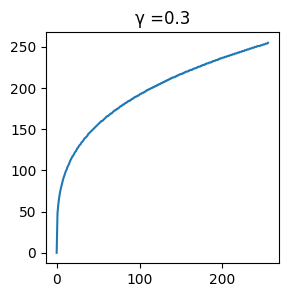

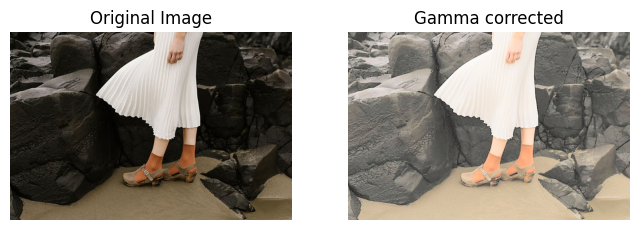

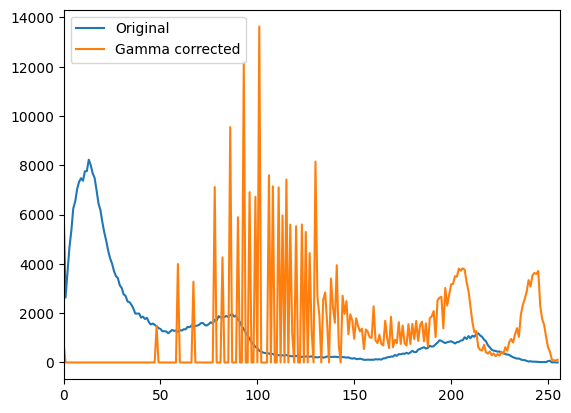

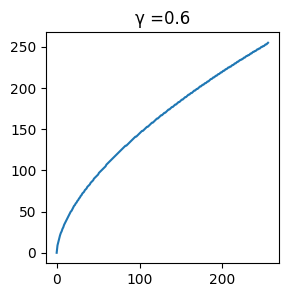

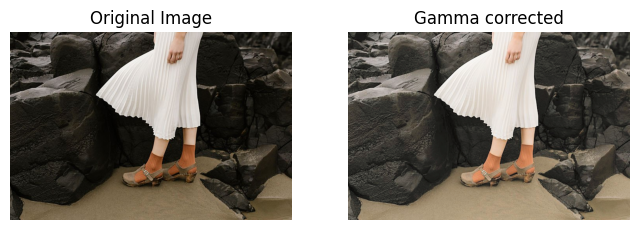

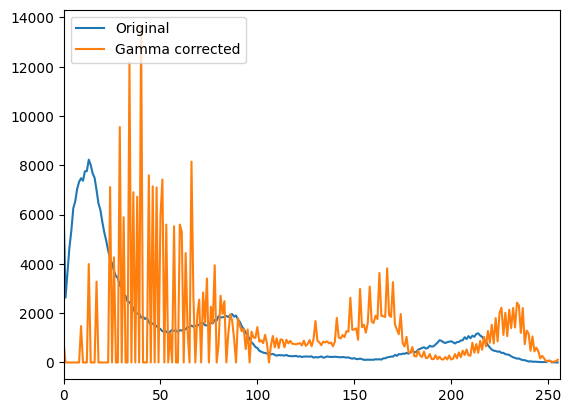

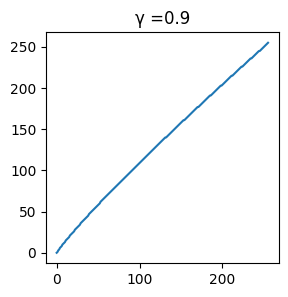

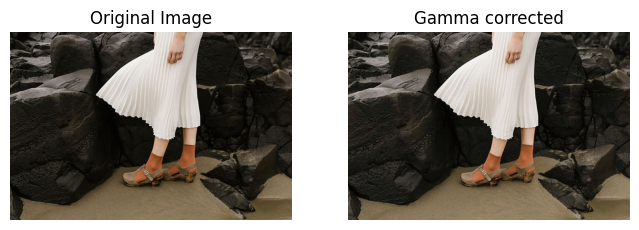

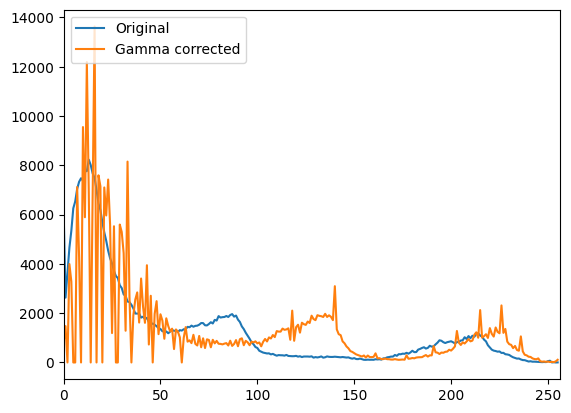

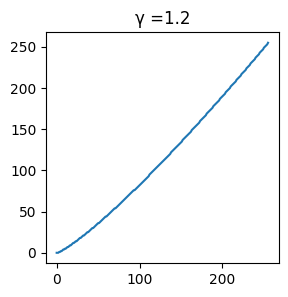

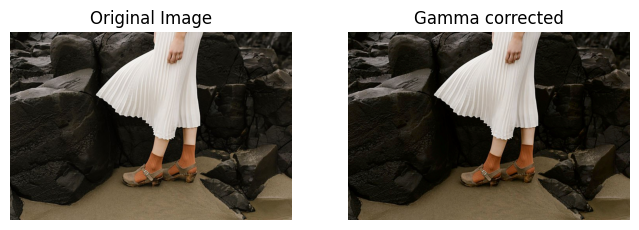

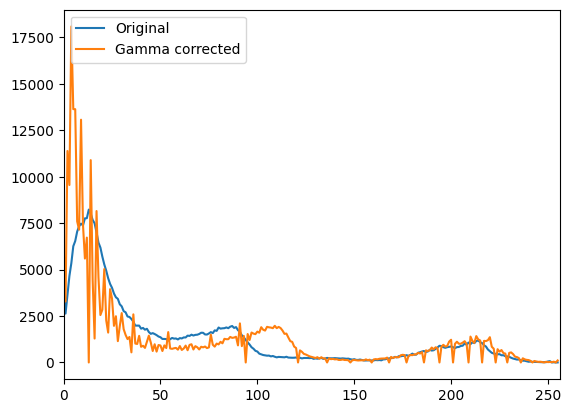

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('/content/drive/MyDrive/A1Vision/highlights_and_shadows.jpg')

L,a,b=cv.split(cv.cvtColor(img,cv.COLOR_BGR2LAB))
gamma=[0.3,0.6,0.9,1.2]

for i in gamma:
  t=np.array([(p/255)**i*255 for p in range(0,256)]).astype(np.uint8)
  g=cv.LUT(L,t)
  corrected_img=cv.merge([g,a,b])

  hist1=cv.calcHist([img],[0],None,[256],[0,256])
  hist2 = cv.calcHist([corrected_img], [0], None, [256], [0, 256])

  fig,ax=plt.subplots(figsize=(3,3))
  ax.set_title("\u03B3 =" + str(i))
  ax.plot(t)

  fig, ax = plt.subplots(1, 2, figsize=(8, 8))
  ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  ax[0].set_title('Original Image')
  ax[0].axis('off')
  ax[1].imshow(cv.cvtColor(corrected_img, cv.COLOR_LAB2RGB))
  ax[1].set_title('Gamma corrected')
  ax[1].axis('off')
  plt.show()

  plt.plot(hist1)
  plt.xlim([0,256])
  plt.plot(hist2)
  plt.xlim([0,256])
  plt.legend(('Original','Gamma corrected'),loc='upper left')
  plt.show()








# Intensity transformation to the saturation plane for increasing the vibrance

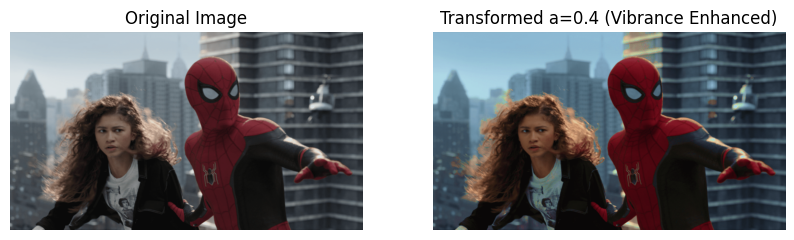

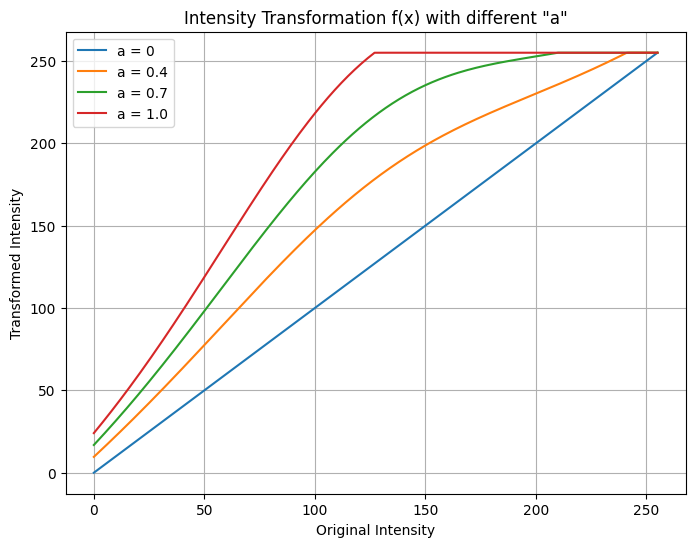

In [ ]:
image_bgr=cv.imread('/content/drive/MyDrive/A1Vision/spider.png',cv.IMREAD_COLOR)
image_hsv=cv.cvtColor(image_bgr,cv.COLOR_BGR2HSV)
h,saturation_plane,v=cv.split(image_hsv)

def intensity_transform(x, a, sigma=70):
    # Transformation function: f(x) = x + a * 128 * exp(-(x - 128)^2 / (2 * sigma^2))
    f_x = np.clip(x + a * 128 * np.exp(-(x - 128)**2 / (2 * sigma**2)), 0, 255)
    return f_x

transformed_saturation_plane = intensity_transform(saturation_plane, a=0.4)

image_copy=image_hsv.copy()
image_copy[:,:,1]=transformed_saturation_plane
transformed_image=cv.cvtColor(image_copy,cv.COLOR_HSV2RGB)
original_image = cv.cvtColor(image_hsv, cv.COLOR_HSV2RGB)


f, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(original_image)
axarr[0].set_title('Original Image')
axarr[0].axis('off')

axarr[1].imshow(transformed_image)
axarr[1].set_title('Transformed a=0.4 (Vibrance Enhanced)')
axarr[1].axis('off')

plt.show()

# Plot the intensity transformation function for different values of 'a'
intensity_values = np.arange(256)  # Array of intensity values from 0 to 255
a_values = [0, 0.4, 0.7, 1.0]  # Different values of 'a' for comparison

plt.figure(figsize=(8, 6))

# Loop through different values of 'a' and plot the transformation function
for a in a_values:
    transformation_values = intensity_transform(intensity_values, a)
    plt.plot(intensity_values, transformation_values, label=f'a = {a}')

# Add labels and a title to the plot
plt.title('Intensity Transformation f(x) with different "a"')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()  # Add a legend to indicate different 'a' values
plt.grid(True)  # Add grid lines to the plot
plt.show()


# Histogram Equalization

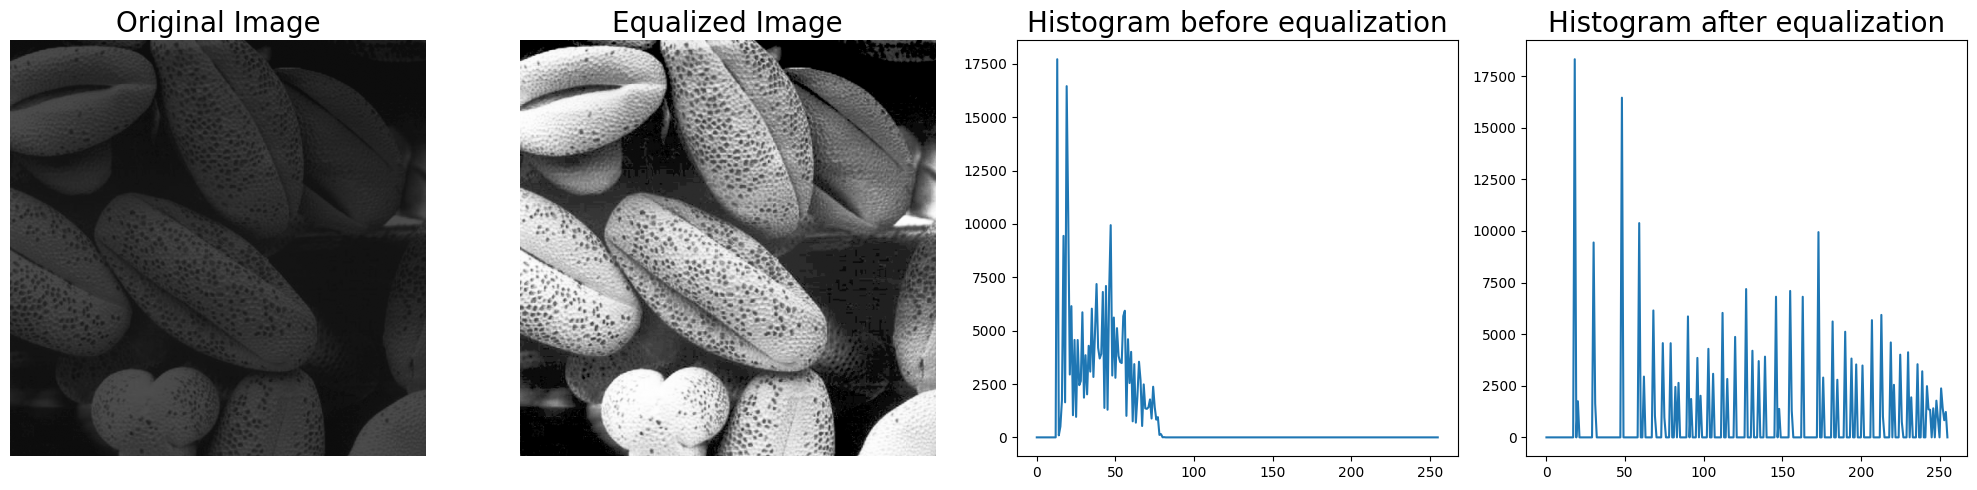

In [ ]:
def hist_equalize(image):
  total=image.shape[0]*image.shape[1]
  hist,bins=np.histogram(image.ravel(), 256, [0, 256])
  cdf = hist.cumsum()
  transform = (cdf * 255 / total).astype(np.uint8)
  equalized_image = transform[image]
  return equalized_image

img5=cv.imread('/content/drive/MyDrive/A1Vision/shells.tif',cv.IMREAD_GRAYSCALE)
equalized_img5 = hist_equalize(img5)

before_hist,_ = np.histogram(img5.ravel(),256,[0,256])
after_hist, _ = np.histogram(equalized_img5.ravel(), 256, [0, 256])

plt.figure(figsize=(20,5))
plt.rc("axes",titlesize=20)

# Display the original image
plt.subplot(141)  # First subplot in a grid of 1 row and 4 columns
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)  # Display the original grayscale image
plt.title("Original Image")  # Set the title for the original image
plt.axis('off')  # Turn off axis labels and ticks

# Display the equalized image
plt.subplot(142)  # Second subplot
plt.imshow(equalized_img5, cmap='gray')  # Display the equalized grayscale image
plt.title("Equalized Image")  # Set the title for the equalized image
plt.axis('off')  # Turn off axis labels and ticks

# Display the histogram before equalization
plt.subplot(143)  # Third subplot
plt.plot(before_hist)  # Plot the histogram of the original image
plt.title("Histogram before equalization")  # Set the title for the histogram before equalization

# Display the histogram after equalization
plt.subplot(144)  # Fourth subplot
plt.plot(after_hist)  # Plot the histogram of the equalized image
plt.title("Histogram after equalization")  # Set the title for the histogram after equalization

# Adjust the layout of the subplots to avoid overlap
plt.tight_layout()  # Adjust the layout to make sure subplots fit neatly

# Show the plots
plt.show()  # Display the figure with the images and histograms


# Sobel Filtering

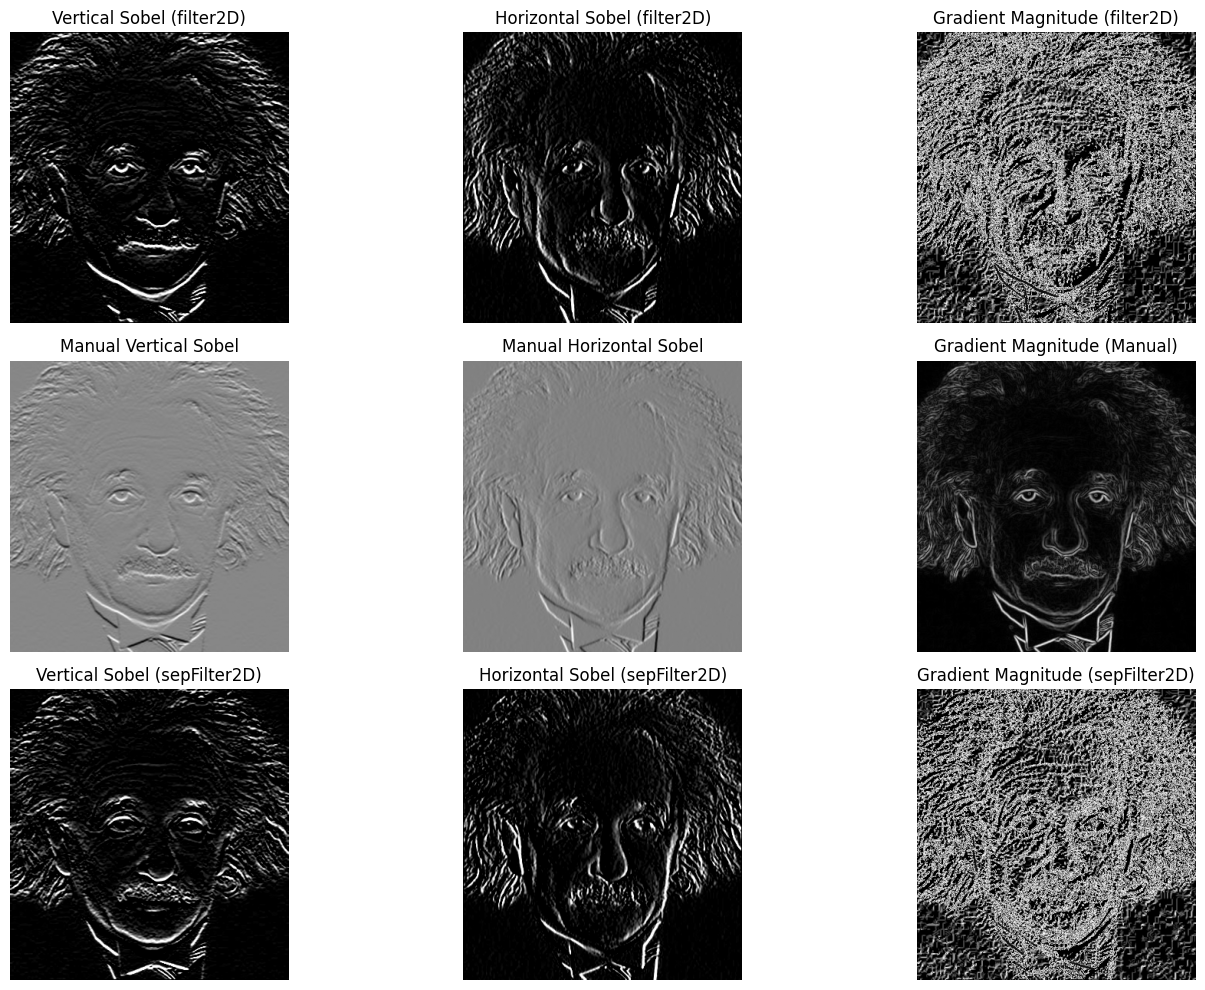

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt



img=cv.imread('/content/drive/MyDrive/A1Vision/einstein.png',cv.IMREAD_GRAYSCALE)

# (a)Using filter2D to apply Sobel filter
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float32')  # Vertical Sobel kernel
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')  # Horizontal Sobel kernel

imv = cv.filter2D(img, -1, sobel_v)  # Apply vertical Sobel
imh = cv.filter2D(img, -1, sobel_h)  # Apply horizontal Sobel
grad_mag = np.sqrt(imv**2 + imh**2)  # Compute gradient magnitude

# (b) Manually applying the Sobel filter
rows, cols = img.shape
kernel_size = 3
imv_manual = np.zeros((rows - kernel_size + 1, cols - kernel_size + 1), dtype='float32')
imh_manual = np.zeros((rows - kernel_size + 1, cols - kernel_size + 1), dtype='float32')

for row in range(rows - kernel_size + 1):
    for col in range(cols - kernel_size + 1):
        imv_manual[row, col] = np.sum(img[row:row + kernel_size, col:col + kernel_size] * sobel_v)
        imh_manual[row, col] = np.sum(img[row:row + kernel_size, col:col + kernel_size] * sobel_h)

grad_mag_manual = np.sqrt(imv_manual**2 + imh_manual**2)  # Compute gradient magnitude

# (c) Using sepFilter2D for Sobel filtering
sobel_h_kernel = np.array([1, 2, 1], dtype=np.float32)
sobel_v_kernel = np.array([1, 0, -1], dtype=np.float32)

im1 = cv.sepFilter2D(img, -1, sobel_h_kernel, sobel_v_kernel)  # Separable Sobel filtering (vertical)
im2 = cv.sepFilter2D(img, -1, sobel_v_kernel, sobel_h_kernel)  # Separable Sobel filtering (horizontal)
grad_mag_sep = np.sqrt(im1**2 + im2**2)  # Compute gradient magnitude



# Display results in a 3x3 grid
plt.figure(figsize=(15, 10))

# (a) filter2D results
plt.subplot(3, 3, 1), plt.imshow(imv, cmap='gray'), plt.title('Vertical Sobel (filter2D)'), plt.axis('off')
plt.subplot(3, 3, 2), plt.imshow(imh, cmap='gray'), plt.title('Horizontal Sobel (filter2D)'), plt.axis('off')
plt.subplot(3, 3, 3), plt.imshow(grad_mag, cmap='gray'), plt.title('Gradient Magnitude (filter2D)'), plt.axis('off')

# (b) Manual Sobel results
plt.subplot(3, 3, 4), plt.imshow(imv_manual, cmap='gray'), plt.title('Manual Vertical Sobel'), plt.axis('off')
plt.subplot(3, 3, 5), plt.imshow(imh_manual, cmap='gray'), plt.title('Manual Horizontal Sobel'), plt.axis('off')
plt.subplot(3, 3, 6), plt.imshow(grad_mag_manual, cmap='gray'), plt.title('Gradient Magnitude (Manual)'), plt.axis('off')

# (c) sepFilter2D results
plt.subplot(3, 3, 7), plt.imshow(im1, cmap='gray'), plt.title('Vertical Sobel (sepFilter2D)'), plt.axis('off')
plt.subplot(3, 3, 8), plt.imshow(im2, cmap='gray'), plt.title('Horizontal Sobel (sepFilter2D)'), plt.axis('off')
plt.subplot(3, 3, 9), plt.imshow(grad_mag_sep, cmap='gray'), plt.title('Gradient Magnitude (sepFilter2D)'), plt.axis('off')

plt.tight_layout()
plt.show()


# Histogram Equalizing the foreground of an image

**(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.**

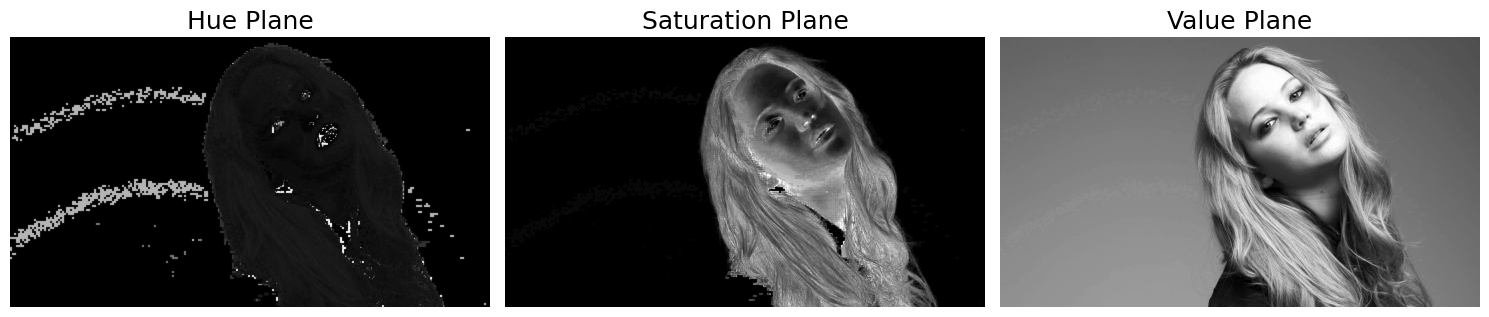

In [17]:
image=cv.imread("/content/drive/MyDrive/A1Vision/jeniffer.jpg")

image_hsv=cv.cvtColor(image,cv.COLOR_BGR2HSV)
hue_plane = image_hsv[:, :, 0]  # Extract hue plane
saturation_plane = image_hsv[:, :, 1]  # Extract saturation plane
value_plane = image_hsv[:, :, 2]  # Extract value plane

# Display the hue, saturation, and value planes in grayscale
plt.figure(figsize=(15, 10))  # Set the figure size
plt.rc("axes", titlesize=18)  # Set the title size for subplots

plt.subplot(131)
plt.imshow(hue_plane, cmap='gray')  # Display hue plane in grayscale
plt.title("Hue Plane")
plt.axis('off')  # Turn off the axis

plt.subplot(132)
plt.imshow(saturation_plane, cmap='gray')  # Display saturation plane in grayscale
plt.title("Saturation Plane")
plt.axis('off')

plt.subplot(133)
plt.imshow(value_plane, cmap='gray')  # Display value plane in grayscale
plt.title("Value Plane")
plt.axis('off')

plt.tight_layout()  # Adjust layout
plt.show()

**(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.**

In [19]:
threshold=12
foreground_mask=(saturation_plane > threshold).astype(np.uint8) * 255
foreground_mask=cv.morphologyEx(foreground_mask,cv.MORPH_CLOSE,cv.getStructuringElement(cv.MORPH_ELLIPSE,(50,50)))
mask_3d=np.repeat(foreground_mask[:,:,None],3,axis=2)

**(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.**

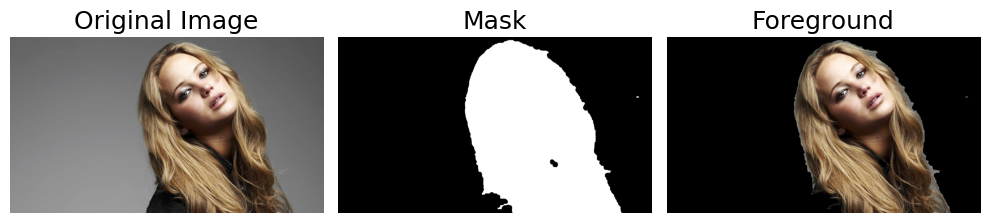

In [21]:
foreground_hsv=cv.bitwise_and(image_hsv,image_hsv,mask=foreground_mask)
foreground_rgb=cv.cvtColor(foreground_hsv,cv.COLOR_HSV2RGB)

# Display original image, mask, and foreground
plt.figure(figsize=(10, 10))  # Set the figure size

plt.subplot(131)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # Display the original image in RGB
plt.title('Original Image')
plt.axis('off')  # Turn off axis

plt.subplot(132)
plt.imshow(foreground_mask, cmap='gray')  # Display the binary mask
plt.title('Mask')
plt.axis('off')

plt.subplot(133)
plt.imshow(foreground_rgb)  # Display the extracted foreground
plt.title('Foreground')
plt.axis('off')

plt.tight_layout()  # Adjust layout
plt.show()



**(d)  Obtain the cumulative sum of the histogram using np.cumsum.**

**(e) Use the formulas in slides to histogram-equalize the foreground**

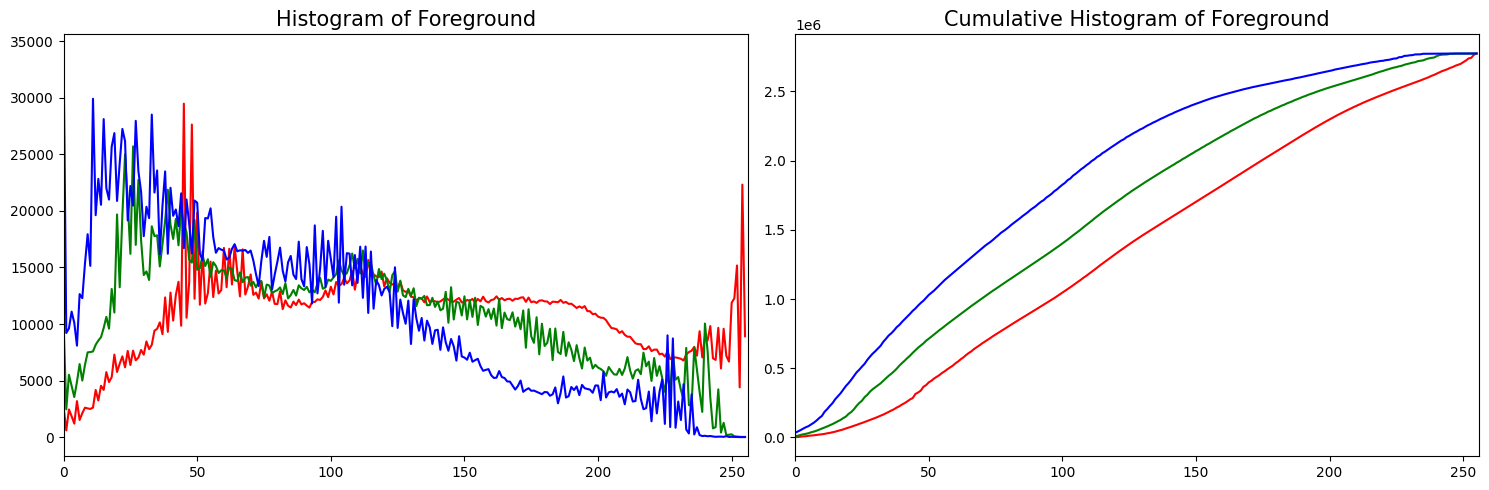

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
plt.rc("axes",titlesize=15)

equalized_foreground=foreground_rgb.copy()
colors=('r','g','b')

for i,color in enumerate(colors):
  hist=cv.calcHist([foreground_rgb],[i],foreground_mask,[256],[0,256])
  ax[0].plot(hist,color=color)
  ax[0].set_xlim([0,256])

  cumulative_hist=np.cumsum(hist)
  ax[1].plot(cumulative_hist,color=color)
  ax[1].set_xlim([0,256])

  transform=(cumulative_hist*255/cumulative_hist[-1]).astype(np.uint8)
  equalized_foreground[:, :, i] = transform[foreground_rgb[:, :, i]]

ax[0].set_title("Histogram of Foreground")  # Set title for histogram
ax[1].set_title("Cumulative Histogram of Foreground")  # Set title for cumulative histogram
plt.tight_layout()  # Adjust layout
plt.show()


**(f) Extract the background and add with the histogram equalized foreground.**

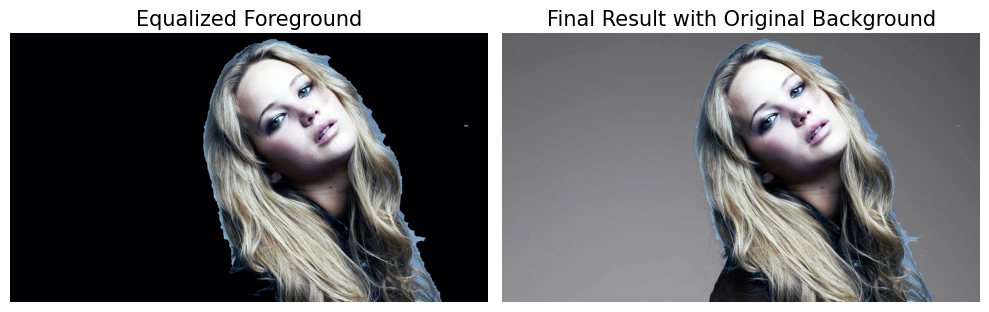

In [25]:
background_mask = cv.bitwise_not(foreground_mask)
background_hsv=cv.bitwise_and(image_hsv,image_hsv,mask=background_mask)
background_rgb=cv.cvtColor(background_hsv,cv.COLOR_HSV2RGB)

final_image=cv.add(background_rgb,equalized_foreground)

# Display the equalized foreground and the final image
plt.figure(figsize=(10, 10))  # Set the figure size

plt.subplot(121)
plt.imshow(equalized_foreground)  # Display the equalized foreground
plt.title('Equalized Foreground')
plt.axis('off')  # Turn off axis

plt.subplot(122)
plt.imshow(final_image)  # Display the final image
plt.title('Final Result with Original Background')
plt.axis('off')  # Turn off axis

plt.tight_layout()  # Adjust layout
plt.show()

# Zooming an image using nearest neighbor and bilinear interpolation

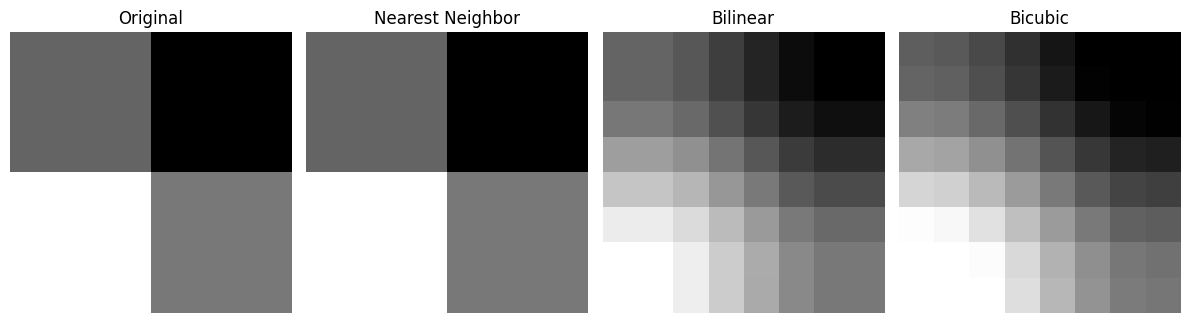

In [4]:
test_img=np.array([[100,0],[255,120]],dtype=np.uint8)
scale_factor=4
new_size = (test_img.shape[1] * scale_factor, test_img.shape[0] * scale_factor)

nearest_img = cv2.resize(test_img, new_size, interpolation=cv2.INTER_NEAREST)
bilinear_img = cv2.resize(test_img, new_size, interpolation=cv2.INTER_LINEAR)
bicubic_img = cv2.resize(test_img, new_size, interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(test_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Nearest Neighbor')
plt.imshow(nearest_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Bilinear')
plt.imshow(bilinear_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Bicubic')
plt.imshow(bicubic_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.tight_layout()
plt.show()


In [15]:
import cv2
import numpy as np
from matplotlib import pprint

def zoom_image(image,scale,interpolation):
  height,width=image.shape[:2]
  new_size=(int(width*scale),int(height*scale))
  return cv2.resize(image,new_size,interpolation=interpolation)

def compute_normalized_ssd(img1,img2,bypass_size_error=True):
  if not bypass_size_error:
    assert img1.shape==img2.shape
  else:
    # Crop the larger image to match the smaller image
    min_height = min(img1.shape[0], img2.shape[0])
    min_width = min(img1.shape[1], img2.shape[1])

    img1 = img1[:min_height, :min_width]
    img2 = img2[:min_height, :min_width]

  ssd=np.sum((img1.astype("float32") - img2.astype("float32"))**2)
  norm_ssd=ssd/np.prod(img1.shape)
  return norm_ssd

def display_images(original,nearest,bilinear,titles):
    plt.figure(figsize=(15, 15))

    # Original image
    plt.subplot(3, 1, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    # Nearest-neighbor zoomed image
    plt.subplot(3, 1, 2)
    plt.imshow(cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    # Bilinear zoomed image
    plt.subplot(3,1, 3)
    plt.imshow(cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB))
    plt.title(titles[2])
    plt.axis('off')

    plt.show()


def get_zoom_and_original_image(small_img,big_img,scale_factor=4,bypass_size_error=True):
  scale_factor=4
  zoomed_nn=zoom_image(small_img,scale_factor,cv2.INTER_NEAREST)
  zoomed_bilinear=zoom_image(small_img,scale_factor,cv2.INTER_LINEAR)
  ssd_nn=compute_normalized_ssd(big_img,zoomed_nn,bypass_size_error=bypass_size_error)
  ssd_bilinear = compute_normalized_ssd(big_img, zoomed_bilinear, bypass_size_error=bypass_size_error)

  print(f"Normalized SSD (Nearest Neighbor): {ssd_nn}")
  print(f"Normalized SSD (Bilinear): {ssd_bilinear}")

  titles=["Original Taylor Image",f"Nearest N. Zoomed Taylor Image, ssd={ssd_nn}",f"Bilinear Zoomed Taylor Image, ssd={ssd_bilinear}"]
  display_images(big_img,zoomed_nn,zoomed_bilinear,titles)







Normalized SSD (Nearest Neighbor): 228.6223363095238
Normalized SSD (Bilinear): 197.40949404761903


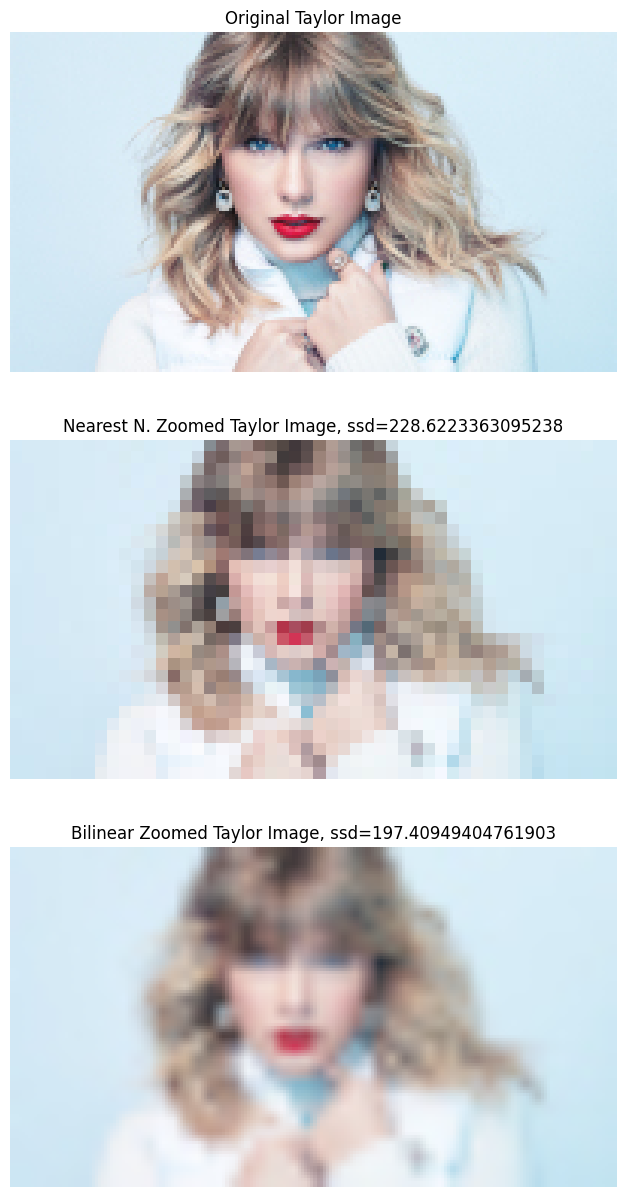

In [16]:
taylor_very_small=cv2.imread("/content/drive/MyDrive/A1Vision/taylor_very_small.jpg")
taylor_small=cv2.imread("/content/drive/MyDrive/A1Vision/taylor_small.jpg")
get_zoom_and_original_image(small_img=taylor_very_small,big_img=taylor_small,scale_factor=4,bypass_size_error=False)

# Segmentation of a Yellow Daisy

In [ ]:
img=cv.imread("/content/drive/MyDrive/A1Vision/einstein.png")

#Initialize mask and models for GrabCut
mask=np.zeros(img.shape[:2],np.uint8)
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)
rectangle = (40, 10, 505, 505)

#Perfoem GrabCut with an initial rectangle around the object
cv.grabCut(img,mask,rectangle,background_model,foreground_model,5,cv.GC_INIT_WITH_RECT)

#Create the segmentation mask for the foreground
mask1=np.where((mask==2) | (mask==0),0,1).astype('uint8')
img1=img*mask1[:,:,np.newaxis]

# Create the segmentation mask for the background
cv.grabCut(img, mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 3) | (mask == 1), 0, 1).astype('uint8')
img2 = img * mask2[:, :, np.newaxis]

#Blur the background image and combine it with the segmented foreground to create an enhanced image
blurred_img = img1 + cv.GaussianBlur(img2, (15, 15), 0)

# Display the final segmentation mask, the foreground, background, original image, and the enhanced image
fig, ax = plt.subplots(1, 5, figsize=(15, 15))

# Show the segmentation mask
ax[0].imshow(mask1, cmap='gray')
ax[0].set_title("Segmentation Mask")
ax[0].axis("off")

# Show the segmented foreground image
ax[1].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground Image")
ax[1].axis("off")

# Show the segmented background image
ax[2].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].set_title("Background Image")
ax[2].axis("off")

# Show the original image for reference
ax[3].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[3].set_title("Original Image")
ax[3].axis("off")

# Show the enhanced image with blurred background
ax[4].imshow(cv.cvtColor(blurred_img, cv.COLOR_BGR2RGB))
ax[4].set_title("Blurred Background")
ax[4].axis("off")

# Show all plots
plt.show()

